In [22]:
import os
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.models import model_from_json

In [23]:
current_location = os.getcwd()
data_location = "data/"

In [24]:
fopen = open(data_location + "pattern.txt", "r")
patterns = fopen.read()
fopen.close()

In [25]:
patterns = patterns.split("\n")
patterns = patterns[:len(patterns) - 1]

In [26]:
patterns_final = []
for k in range(len(patterns)):
    if len(patterns[k]) == 10:
        patterns_final.append(patterns[k].upper())
        
print ("Given patterns :", len(patterns_final))

Given patterns : 82


In [27]:
data_prep = []
for k in range(len(patterns_final)):
    one = []
    for m in range(len(patterns_final[k])):
        one.append(ord(patterns_final[k][m]) - ord('A') + 1)
    data_prep.append(one)

In [28]:
print (data_prep[9], patterns_final[9])

[1, 2, 3, 3, 1, 2, 2, 3, 1, 2] ABCCABBCAB


In [29]:
input_ = []
target_ = []

input_size = 5
dimension = 2

for k in range(len(data_prep)):
    one = []
    two = []
    for m in range(10 - input_size):
        one.append(data_prep[k][m:input_size + m])
        two.append(data_prep[k][input_size + m])
    
    three = []
    six = []
    for p in range(len(one) + 1 - dimension):
        four = []
        five = []
        for l in range(dimension):
            four.append(one[p + l])
            five.append(two[p + l])
        three.append(four)
        six.append(five)
    
    for b in range(len(three)):
        input_.append(three[b])
        target_.append(six[b])

In [30]:
print (len(input_))
print (input_[0])
print (len(target_))
print (target_[0])

328
[[1, 3, 2, 2, 3], [3, 2, 2, 3, 3]]
328
[3, 1]


In [31]:
target = []

for k in range(len(target_)):
    a = [0] * 3
    a[target_[k][len(target_[k]) - 1] - 1] = 1
    target.append(a)

In [32]:
print (target[0])

[1, 0, 0]


In [33]:
trainX = input_[:int(len(input_) * 0.6)]
trainY = target[:int(len(target) * 0.6)]

validateX = input_[int(len(input_) * 0.6) : int(len(input_) * 0.8)]
validateY = target[int(len(target) * 0.6) : int(len(target) * 0.8)]

testX = input_[int(len(input_) * 0.8):]
testY = target[int(len(target) * 0.8):]

trainX = np.array(trainX)
trainY = np.array(trainY)
validateX = np.array(validateX)
validateY = np.array(validateY)
testX = np.array(testX)
testY = np.array(testY)

In [34]:
print (trainX[0], trainY[0], input_[0])
print (len(trainX[0]))

[[1 3 2 2 3]
 [3 2 2 3 3]] [1 0 0] [[1, 3, 2, 2, 3], [3, 2, 2, 3, 3]]
2


In [52]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(200, return_sequences = True, input_shape=(dimension, len(trainX[0][0])), recurrent_dropout = 0.15, dropout = 0.1))
model.add(LSTM(200, return_sequences = True, recurrent_dropout = 0.15, dropout = 0.1))
model.add(LSTM(200, return_sequences = False, recurrent_dropout = 0.15, dropout = 0.1))
model.add(Dense(3, activation = "softmax"))

In [53]:
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
history = model.fit(trainX, trainY, epochs=500, batch_size=1000, verbose=1, validation_data = (validateX, validateY), shuffle=True)

Train on 196 samples, validate on 66 samples
Epoch 1/500
196/196 [==============================] - 7s 33ms/step - loss: 1.0986 - acc: 0.3520 - val_loss: 1.0945 - val_acc: 0.4242
Epoch 2/500
196/196 [==============================] - 0s 712us/step - loss: 1.0971 - acc: 0.3571 - val_loss: 1.0903 - val_acc: 0.4242
Epoch 3/500
196/196 [==============================] - 0s 512us/step - loss: 1.0952 - acc: 0.3571 - val_loss: 1.0864 - val_acc: 0.4242
Epoch 4/500
196/196 [==============================] - 0s 583us/step - loss: 1.0943 - acc: 0.3571 - val_loss: 1.0828 - val_acc: 0.4242
Epoch 5/500
196/196 [==============================] - 0s 519us/step - loss: 1.0926 - acc: 0.3571 - val_loss: 1.0799 - val_acc: 0.4242
Epoch 6/500
196/196 [==============================] - 0s 541us/step - loss: 1.0940 - acc: 0.3571 - val_loss: 1.0778 - val_acc: 0.4242
Epoch 7/500
196/196 [==============================] - 0s 547us/step - loss: 1.0933 - acc: 0.3571 - val_loss: 1.0765 - val_acc: 0.4242
Epoch 8/500

Epoch 61/500
196/196 [==============================] - 0s 478us/step - loss: 1.0009 - acc: 0.4592 - val_loss: 0.9338 - val_acc: 0.6364
Epoch 62/500
196/196 [==============================] - 0s 460us/step - loss: 0.9925 - acc: 0.4541 - val_loss: 0.9280 - val_acc: 0.6364
Epoch 63/500
196/196 [==============================] - 0s 451us/step - loss: 0.9828 - acc: 0.4949 - val_loss: 0.9252 - val_acc: 0.6212
Epoch 64/500
196/196 [==============================] - 0s 498us/step - loss: 1.0395 - acc: 0.4490 - val_loss: 0.9373 - val_acc: 0.5606
Epoch 65/500
196/196 [==============================] - 0s 466us/step - loss: 1.0144 - acc: 0.4745 - val_loss: 0.9496 - val_acc: 0.5455
Epoch 66/500
196/196 [==============================] - 0s 437us/step - loss: 0.9753 - acc: 0.4898 - val_loss: 0.9525 - val_acc: 0.5303
Epoch 67/500
196/196 [==============================] - 0s 486us/step - loss: 0.9968 - acc: 0.4337 - val_loss: 0.9373 - val_acc: 0.5455
Epoch 68/500
196/196 [==========================

Epoch 122/500
196/196 [==============================] - 0s 459us/step - loss: 0.8924 - acc: 0.5765 - val_loss: 0.8497 - val_acc: 0.6061
Epoch 123/500
196/196 [==============================] - 0s 545us/step - loss: 0.8705 - acc: 0.5612 - val_loss: 0.8374 - val_acc: 0.6061
Epoch 124/500
196/196 [==============================] - 0s 518us/step - loss: 0.8982 - acc: 0.5459 - val_loss: 0.8491 - val_acc: 0.5455
Epoch 125/500
196/196 [==============================] - 0s 469us/step - loss: 0.8911 - acc: 0.5561 - val_loss: 0.8752 - val_acc: 0.5303
Epoch 126/500
196/196 [==============================] - 0s 464us/step - loss: 0.8892 - acc: 0.5408 - val_loss: 0.8759 - val_acc: 0.5455
Epoch 127/500
196/196 [==============================] - 0s 498us/step - loss: 0.8640 - acc: 0.5816 - val_loss: 0.8370 - val_acc: 0.5606
Epoch 128/500
196/196 [==============================] - 0s 461us/step - loss: 0.8585 - acc: 0.5816 - val_loss: 0.8076 - val_acc: 0.5758
Epoch 129/500
196/196 [==================

Epoch 182/500
196/196 [==============================] - 0s 1ms/step - loss: 0.8059 - acc: 0.6224 - val_loss: 0.7679 - val_acc: 0.6364
Epoch 183/500
196/196 [==============================] - 0s 606us/step - loss: 0.7840 - acc: 0.6122 - val_loss: 0.7210 - val_acc: 0.7121
Epoch 184/500
196/196 [==============================] - 0s 541us/step - loss: 0.8561 - acc: 0.5969 - val_loss: 0.7166 - val_acc: 0.6515
Epoch 185/500
196/196 [==============================] - 0s 629us/step - loss: 0.8410 - acc: 0.5867 - val_loss: 0.7538 - val_acc: 0.6515
Epoch 186/500
196/196 [==============================] - 0s 560us/step - loss: 0.8242 - acc: 0.6173 - val_loss: 0.8608 - val_acc: 0.6667
Epoch 187/500
196/196 [==============================] - 0s 627us/step - loss: 0.8312 - acc: 0.5663 - val_loss: 0.8567 - val_acc: 0.6212
Epoch 188/500
196/196 [==============================] - 0s 612us/step - loss: 0.8343 - acc: 0.6020 - val_loss: 0.7909 - val_acc: 0.6364
Epoch 189/500
196/196 [====================

Epoch 243/500
196/196 [==============================] - 0s 2ms/step - loss: 0.7340 - acc: 0.6480 - val_loss: 0.8190 - val_acc: 0.6061
Epoch 244/500
196/196 [==============================] - 0s 2ms/step - loss: 0.7337 - acc: 0.6480 - val_loss: 0.8386 - val_acc: 0.6061
Epoch 245/500
196/196 [==============================] - 0s 2ms/step - loss: 0.8029 - acc: 0.6276 - val_loss: 0.8116 - val_acc: 0.6061
Epoch 246/500
196/196 [==============================] - 0s 2ms/step - loss: 0.7867 - acc: 0.6327 - val_loss: 0.7960 - val_acc: 0.5909
Epoch 247/500
196/196 [==============================] - 0s 2ms/step - loss: 0.7156 - acc: 0.6633 - val_loss: 0.7961 - val_acc: 0.5758
Epoch 248/500
196/196 [==============================] - 0s 2ms/step - loss: 0.7429 - acc: 0.6224 - val_loss: 0.7857 - val_acc: 0.6515
Epoch 249/500
196/196 [==============================] - 0s 2ms/step - loss: 0.8067 - acc: 0.5765 - val_loss: 0.7532 - val_acc: 0.5909
Epoch 250/500
196/196 [==============================] 

Epoch 304/500
196/196 [==============================] - 0s 2ms/step - loss: 0.7524 - acc: 0.6327 - val_loss: 0.8080 - val_acc: 0.6061
Epoch 305/500
196/196 [==============================] - 0s 2ms/step - loss: 0.7445 - acc: 0.6276 - val_loss: 0.8434 - val_acc: 0.6212
Epoch 306/500
196/196 [==============================] - 0s 1ms/step - loss: 0.7285 - acc: 0.6531 - val_loss: 0.8272 - val_acc: 0.6061
Epoch 307/500
196/196 [==============================] - 0s 905us/step - loss: 0.7475 - acc: 0.6531 - val_loss: 0.8056 - val_acc: 0.6061
Epoch 308/500
196/196 [==============================] - 0s 925us/step - loss: 0.7552 - acc: 0.6276 - val_loss: 0.7848 - val_acc: 0.5909
Epoch 309/500
196/196 [==============================] - 0s 993us/step - loss: 0.7418 - acc: 0.6480 - val_loss: 0.7690 - val_acc: 0.6515
Epoch 310/500
196/196 [==============================] - 0s 1ms/step - loss: 0.7334 - acc: 0.6276 - val_loss: 0.7664 - val_acc: 0.6515
Epoch 311/500
196/196 [==========================

Epoch 365/500
196/196 [==============================] - 0s 1ms/step - loss: 0.6744 - acc: 0.6837 - val_loss: 0.8406 - val_acc: 0.5909
Epoch 366/500
196/196 [==============================] - 0s 2ms/step - loss: 0.6933 - acc: 0.6684 - val_loss: 0.8318 - val_acc: 0.6061
Epoch 367/500
196/196 [==============================] - 0s 1ms/step - loss: 0.6841 - acc: 0.6684 - val_loss: 0.8015 - val_acc: 0.6212
Epoch 368/500
196/196 [==============================] - 0s 1ms/step - loss: 0.7012 - acc: 0.6888 - val_loss: 0.7791 - val_acc: 0.6515
Epoch 369/500
196/196 [==============================] - 0s 1ms/step - loss: 0.7285 - acc: 0.6429 - val_loss: 0.7761 - val_acc: 0.6667
Epoch 370/500
196/196 [==============================] - 0s 1ms/step - loss: 0.7205 - acc: 0.6224 - val_loss: 0.7624 - val_acc: 0.6515
Epoch 371/500
196/196 [==============================] - 0s 725us/step - loss: 0.7102 - acc: 0.6378 - val_loss: 0.7717 - val_acc: 0.6667
Epoch 372/500
196/196 [==============================

Epoch 425/500
196/196 [==============================] - 0s 916us/step - loss: 0.6752 - acc: 0.6684 - val_loss: 0.8646 - val_acc: 0.6061
Epoch 426/500
196/196 [==============================] - 0s 738us/step - loss: 0.6590 - acc: 0.6888 - val_loss: 0.8531 - val_acc: 0.6061
Epoch 427/500
196/196 [==============================] - 0s 787us/step - loss: 0.6698 - acc: 0.6531 - val_loss: 0.8528 - val_acc: 0.6364
Epoch 428/500
196/196 [==============================] - 0s 758us/step - loss: 0.6779 - acc: 0.6531 - val_loss: 0.8555 - val_acc: 0.6667
Epoch 429/500
196/196 [==============================] - 0s 831us/step - loss: 0.6682 - acc: 0.6939 - val_loss: 0.8485 - val_acc: 0.6364
Epoch 430/500
196/196 [==============================] - 0s 841us/step - loss: 0.6475 - acc: 0.6888 - val_loss: 0.8570 - val_acc: 0.6212
Epoch 431/500
196/196 [==============================] - 0s 839us/step - loss: 0.6690 - acc: 0.6531 - val_loss: 0.8570 - val_acc: 0.6212
Epoch 432/500
196/196 [==================

Epoch 486/500
196/196 [==============================] - 0s 957us/step - loss: 0.5943 - acc: 0.7143 - val_loss: 0.8808 - val_acc: 0.6364
Epoch 487/500
196/196 [==============================] - 0s 850us/step - loss: 0.6155 - acc: 0.6684 - val_loss: 0.8888 - val_acc: 0.6364
Epoch 488/500
196/196 [==============================] - 0s 957us/step - loss: 0.5863 - acc: 0.7296 - val_loss: 0.9052 - val_acc: 0.6515
Epoch 489/500
196/196 [==============================] - 0s 823us/step - loss: 0.6114 - acc: 0.7194 - val_loss: 0.9153 - val_acc: 0.6667
Epoch 490/500
196/196 [==============================] - 0s 857us/step - loss: 0.6226 - acc: 0.6939 - val_loss: 0.9285 - val_acc: 0.6667
Epoch 491/500
196/196 [==============================] - 0s 769us/step - loss: 0.6646 - acc: 0.6429 - val_loss: 0.9083 - val_acc: 0.6667
Epoch 492/500
196/196 [==============================] - 0s 987us/step - loss: 0.6025 - acc: 0.7245 - val_loss: 0.8775 - val_acc: 0.6667
Epoch 493/500
196/196 [==================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


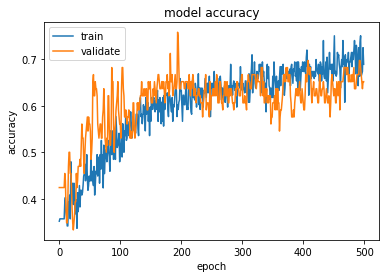

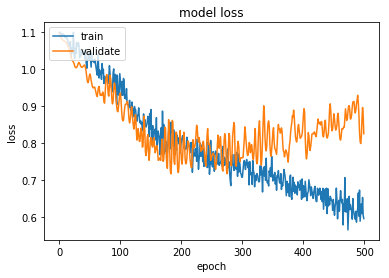

In [56]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [57]:
scores_train = model.evaluate(trainX, trainY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(validateX, validateY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

scores_train = model.evaluate(testX, testY)
print("Train", "%s: %.2f%%" % (model.metrics_names[1], scores_train[1]*100))

196/196 [==============================] - 0s 324us/step
Train acc: 78.57%
66/66 [==============================] - 0s 391us/step
Train acc: 65.15%
66/66 [==============================] - 0s 366us/step
Train acc: 57.58%


In [44]:
predictions = model.predict(testX)
for k in range(len(testX)):
    a = [0]*3
    maxx = max(predictions[k])
    pos = 0
    for m in range(len(predictions[k])):
        if predictions[k][m] == maxx:
            pos = m
            break
    a[pos] = 1
    #print (predictions[k], " : ",  a, " : ",testY[k])
    print (a, " : ", list(testY[k]))

[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [0, 0, 1]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[0, 1, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [0, 0, 1]
[1, 0, 0]  :  [1, 0, 0]
[0, 1, 0]  :  [0, 1, 0]
[0, 0, 1]  :  [1, 0, 0]
[0, 0, 1]  :  [0, 0, 1]
[0, 0, 1]  :  [0, 0, 1]
[1, 0, 0]  :  [0

In [45]:
model_json = model.to_json()
with open("model_lstm/model_7th.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_lstm/model_7th.h5")
print("Saved model to disk")

Saved model to disk
